# Pendulum DAE system

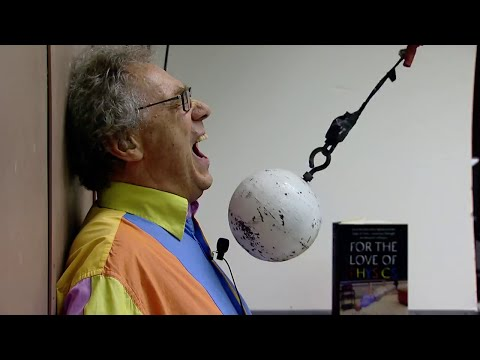

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('4a0FbQdH3dY')

## Formulation

Backward solution:

$$
\begin{split} 
\mathbf {\dot x}  &  =  \mathbf {f (x,y^{ini},u^{ini}) } \\
\mathbf 0 & =  \mathbf {g (x,y^{ini},u^{ini}) }  
\end{split}
$$

Foreward solution:

$$
\begin{split} 
\mathbf {\dot x}  &  =  \mathbf {f (x,y^{run},u^{run}) } \\
\mathbf 0 & =  \mathbf {g (x,y^{run},u^{run}) }  
\end{split}
$$
 
### Differential equations

$$   
\begin{eqnarray}
f_1 &=& \frac{dp_x}{dt} = v_x \\
f_2 &=& \frac{dp_y}{dt} = v_y \\
f_3 &=& \frac{dv_x}{dt} = \frac{1}{M} \left(-2 p_x \lambda + f_x - K_d v_x \right)  \\
f_4 &=& \frac{dv_y}{dt} = \frac{1}{M} \left(-M G - 2 p_y \lambda - K_d v_y \right)
\end{eqnarray}
$$

### Algebraic equations

$$
\begin{eqnarray}
g_1 &=& p_x^2 + p_y^2 - L^2  \\
g_2 &=& -\theta + \arctan\left(p_x,-p_y\right) 
\end{eqnarray}
$$


The dynamic states are:

$$
\mathbf{f} =
\left[
\begin{array}{c}
f_1\\
f_2\\
f_3\\
f_4
\end{array}
\right]
\;\;\;\;\;\;
\mathbf{g} =
\left[
\begin{array}{c}
g_1\\
g_2
\end{array}
\right]
\;\;\;\;\;\;
$$

$$
\mathbf x = \left[
\begin{array}{c} 
p_x \\ 
p_y \\ 
v_x \\ 
v_y 
\end{array} \right]
\;\;\;\;
\mathbf {y^{ini}} = \left[
\begin{array}{c} 
 \lambda \\ 
 f_x
\end{array} \right] 
\;\;\;\;
\mathbf {y^{run}} = \left[
\begin{array}{c} 
 \lambda \\ 
\theta
\end{array} \right] 
\;\;\;\;
\mathbf {u^{ini}} = \left[
\begin{array}{c} 
\theta
\end{array} \right] 
\;\;\;\;
\mathbf {u^{run}} = \left[
\begin{array}{c} 
f_x
\end{array} \right]
$$

### Outputs

We may be interested in the potential energy:
$$
E_p = M G p_y
$$

And the kinetical energy:
$$
E_k = \frac{1}{2} M \left(v_x^2 + v_y^2 \right)
$$

$$
\mathbf{h} =
\left[
\begin{array}{c}
M G p_y\\
\frac{1}{2} M \left(v_x^2 + v_y^2 \right)
\end{array}
\right]
\;\;\;\;\;\;
\mathbf{z} =
\left[
\begin{array}{c}
E_p\\
E_k
\end{array}
\right]
$$

9.45 he sets the bom in 5deg (How much force in x did he applied?)



In [2]:
import numpy as np
import sympy as sym
import pydae.build as db

### Definition of variables and constants

In [3]:
params_dict = {'L':5.21,'G':9.81,'M':10.0,'K_d':1e-3}


u_ini_dict = {'theta':np.deg2rad(5.0)}  # input for the initialization problem
u_run_dict = {'f_x':0}                  # input for the running problem, its value is updated 


x_list = ['p_x','p_y','v_x','v_y']  # dynamic states
y_ini_list = ['lam','f_x']          # algebraic states for the initialization problem
y_run_list = ['lam','theta']        # algebraic for the running problem

sys_vars = {'params':params_dict,
            'u_list':u_run_dict,
            'x_list':x_list,
            'y_list':y_run_list}

exec(db.sym_gen_str())  # exec to generate the required symbolic varables and constants

### System formulation

In [4]:
dp_x = v_x
dp_y = v_y
dv_x = (-2*p_x*lam + f_x - K_d*v_x)/M
dv_y = (-M*G - 2*p_y*lam - K_d*v_y)/M   

g_1 = p_x**2 + p_y**2 - L**2 -lam*1e-6
g_2 = -theta + sym.atan2(p_x,-p_y)

## Build the model

In [5]:
sys = {'name':'pendulum',
       'params_dict':params_dict,
       'f_list':[dp_x,dp_y,dv_x,dv_y],
       'g_list':[g_1,g_2],
       'x_list':x_list,
       'y_ini_list':y_ini_list,
       'y_run_list':y_run_list,
       'u_run_dict':u_run_dict,
       'u_ini_dict':u_ini_dict,
       'h_dict':{'E_p':M*G*p_y,'E_k':0.5*M*(v_x**2+v_y**2),'theta':theta}}

sys = db.system(sys)
db.sys2num(sys)

In [6]:
from IPython.core.display import HTML


In [7]:
times = np.linspace(0,1,1000)
pos = np.sin(times)
keyTimes = ""
keyPoints = ""
for t in times:
    keyTimes  += f'{t:0.4f};'
    keyPoints += f'{(np.sin(30*t)*0.1+0.5):0.4f};' 
keyTimes  = keyTimes[:-1].replace("'",'"')    
keyPoints = keyPoints[:-1].replace("'",'"') 

#keyPoints = "0;0.2;0.4;0.6;0.8;1.0"
#keyTimes  = "0;0.3;0.5;0.6;0.8;1.0"

HTML(f'''<svg viewBox="0 0 500 500" xmlns="http://www.w3.org/2000/svg"
    xmlns:xlink="http://www.w3.org/1999/xlink">
  <path d="m 110.36905,102.05357 a 39.309525,39.309525 0 0 1 -19.654764,34.04305 39.309525,39.309525 0 0 1 -39.309525,0 A 39.309525,39.309525 0 0 1 31.75,102.05357"
      stroke="lightgrey" stroke-width="2" fill="none" id="motionPath"/>
  <circle r="5" fill="red">
    <animateMotion dur="30s" repeatCount="indefinite"
        keyPoints={keyPoints} 
        keyTimes= {keyTimes} calcMode="linear">
      <mpath xlink:href="#motionPath"/>
    </animateMotion>
  </circle>
</svg>''')